In [1]:
import statsmodels.formula.api as smf
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../analysis/mouse_m01_d2/results/simclr_neural_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/simclr_neural_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/simclr_neural_m03_d4.json"),
    Path("../../analysis/mouse_m01_d2/results/vgg19_neural_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/vgg19_neural_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/vgg19_neural_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 210 rows from 6 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,vgg19_neural,m01_d2,conv2_2,NaN,0.021,0.129,1.396,1.423,0.114,NaN,NaN
1,vgg19_neural,m01_d2,conv2_2,10.0,0.018,0.110,1.396,1.423,0.184,-0.099,-0.118
2,vgg19_neural,m01_d2,conv2_2,20.0,0.019,0.111,1.396,1.423,0.180,-0.094,-0.118
3,vgg19_neural,m01_d2,conv2_2,50.0,0.021,0.129,1.396,1.423,0.177,-0.087,-0.119
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,1.396,1.423,0.177,-0.091,-0.120
...,...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural,m02_d3,fc,200.0,0.021,0.168,1.704,1.712,0.157,0.107,NaN
96,simclr_neural,m02_d3,fc,300.0,0.021,0.169,1.704,1.712,0.157,0.105,NaN
97,simclr_neural,m02_d3,fc,400.0,0.021,0.169,1.704,1.712,0.158,0.110,NaN
98,simclr_neural,m02_d3,fc,500.0,0.021,0.169,1.704,1.712,0.158,0.084,NaN


In [2]:
# Filter to n_pcs = 100 and exclude Gabor
df_filtered = df.query("n_pcs == 100 and model_target in ['simclr_neural', 'vgg19_neural']").copy()
df_filtered.head(100)

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,1.396,1.423,0.177,-0.091,-0.120
9,vgg19_neural,m01_d2,conv3_4,100.0,0.018,0.109,1.515,1.462,0.199,-0.056,-0.136
14,vgg19_neural,m01_d2,conv4_4,100.0,0.019,0.128,1.616,1.645,0.160,0.000,-0.106
19,vgg19_neural,m01_d2,conv5_4,100.0,0.012,0.099,1.867,1.698,0.122,0.252,-0.118
24,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.702,1.711,0.214,0.108,-0.065
33,vgg19_neural,m01_d2,fc2,100.0,0.010,0.095,1.583,1.589,0.093,0.447,-0.112
38,simclr_neural,m01_d2,layer1,100.0,0.022,0.114,3.891,4.271,0.225,-0.114,-0.097
47,simclr_neural,m01_d2,layer2,100.0,0.043,0.178,3.487,3.872,0.233,-0.080,-0.076
56,simclr_neural,m01_d2,layer3,100.0,0.046,0.172,1.911,1.917,0.245,-0.005,-0.081
65,simclr_neural,m01_d2,layer4,100.0,0.029,0.132,1.887,1.894,0.193,0.085,-0.071


In [3]:
models = {}

for model_name in ['simclr_neural', 'vgg19_neural']:
    df_model = df_filtered[df_filtered['model_target'] == model_name].copy()

    # Drop rows with NaNs in predictors
    df_model = df_model.dropna(subset=['alpha', 'spearman_correlation', 'silhouette_score', 'mean_fev'])

    # Fit the mixed-effects model
    md = smf.mixedlm(
        formula="mean_fev ~ alpha + spearman_correlation + silhouette_score",
        data=df_model,
        groups="mouse_id"
    )
    mdf = md.fit()
    models[model_name] = mdf

    print(f"\n--- {model_name.upper()} ---")
    print(mdf.summary())


--- SIMCLR_NEURAL ---
             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    mean_fev
No. Observations:    15         Method:                REML    
No. Groups:          3          Scale:                 0.0004  
Min. group size:     5          Log-Likelihood:        26.8850 
Max. group size:     5          Converged:             Yes     
Mean group size:     5.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            -0.245    0.206 -1.188 0.235 -0.649  0.159
alpha                 0.014    0.027  0.518 0.605 -0.040  0.068
spearman_correlation  1.829    0.746  2.450 0.014  0.366  3.292
silhouette_score      0.349    0.368  0.948 0.343 -0.373  1.071
mouse_id Var          0.002    0.136                           


--- VGG19_NEURAL ---
       

/Users/callummessiter/workspace/msc-neuro/research-project/myenv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/callummessiter/workspace/msc-neuro/research-project/myenv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



--- SIMCLR_NEURAL (OLS) ---

Predictor correlations:
                              alpha  spearman_correlation  \
alpha                      1.000000              0.304409   
spearman_correlation       0.304409              1.000000   
silhouette_score_stringer -0.791370             -0.295816   

                           silhouette_score_stringer  
alpha                                      -0.791370  
spearman_correlation                       -0.295816  
silhouette_score_stringer                   1.000000  

Model fits:
rsa                  AIC =  -64.72 | Adj. R² =  0.370
rsa, alpha           AIC =  -63.72 | Adj. R² =  0.361
rsa, semanticity     AIC =  -62.86 | Adj. R² =  0.323
rsa, alpha, semanticity AIC =  -62.13 | Adj. R² =  0.322
null                 AIC =  -58.68 | Adj. R² = -0.000
alpha                AIC =  -56.68 | Adj. R² = -0.077
semanticity          AIC =  -56.91 | Adj. R² = -0.061
alpha, semanticity   AIC =  -55.20 | Adj. R² = -0.127


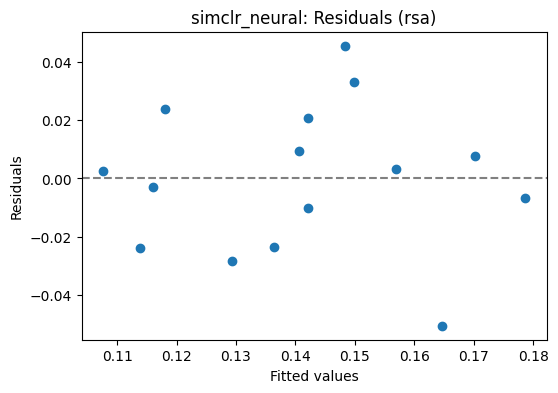

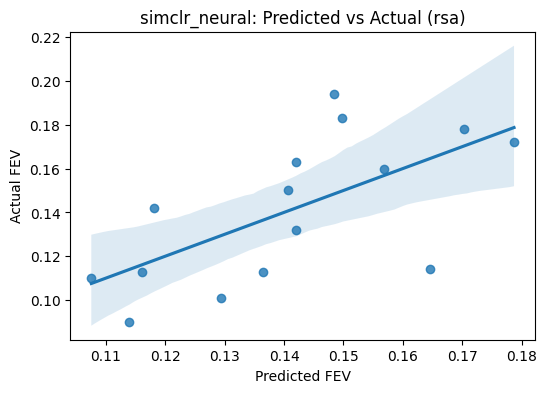


--- VGG19_NEURAL (OLS) ---

Predictor correlations:
                              alpha  spearman_correlation  \
alpha                      1.000000             -0.380223   
spearman_correlation      -0.380223              1.000000   
silhouette_score_stringer  0.256800             -0.460226   

                           silhouette_score_stringer  
alpha                                       0.256800  
spearman_correlation                       -0.460226  
silhouette_score_stringer                   1.000000  

Model fits:
rsa                  AIC =  -81.94 | Adj. R² =  0.226
rsa, alpha           AIC =  -79.97 | Adj. R² =  0.163
rsa, semanticity     AIC =  -84.68 | Adj. R² =  0.388
rsa, alpha, semanticity AIC =  -82.87 | Adj. R² =  0.341
null                 AIC =  -78.99 | Adj. R² =  0.000
alpha                AIC =  -77.85 | Adj. R² = -0.017
semanticity          AIC =  -77.32 | Adj. R² = -0.053
alpha, semanticity   AIC =  -76.61 | Adj. R² = -0.048


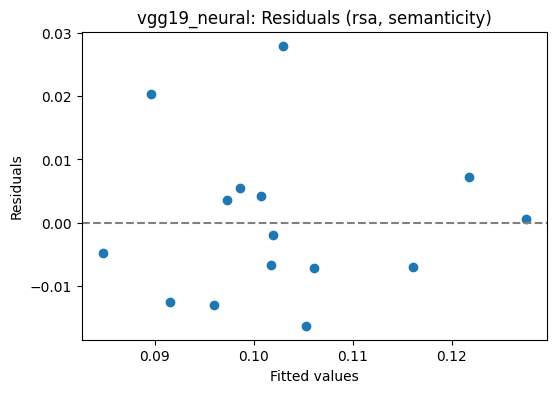

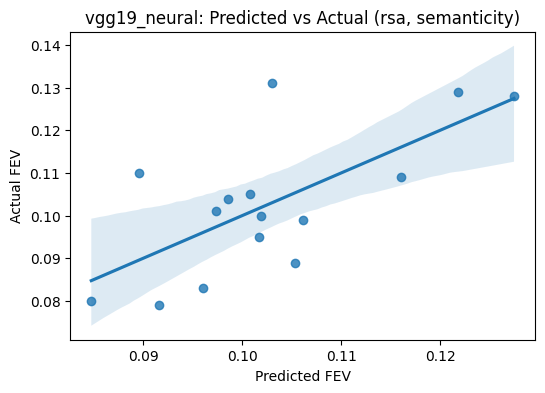

In [4]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

summary_rows = []

for model_name in ['simclr_neural', 'vgg19_neural']:
    print(f"\n--- {model_name.upper()} (OLS) ---")

    df_model = df_filtered[df_filtered['model_target'] == model_name].copy()
    df_model = df_model.dropna(subset=["alpha", "spearman_correlation", "silhouette_score_stringer", "mean_fev"])

    # check multicollinearity
    print("\nPredictor correlations:")
    print(df_model[["alpha", "spearman_correlation", "silhouette_score_stringer"]].corr())

    model_formulas = {
        "rsa": "mean_fev ~ spearman_correlation",
        "rsa, alpha": "mean_fev ~ alpha + spearman_correlation",
        "rsa, semanticity": "mean_fev ~ spearman_correlation + silhouette_score_stringer",
        "rsa, alpha, semanticity": "mean_fev ~ alpha + spearman_correlation + silhouette_score_stringer",
        "null": "mean_fev ~ 1",
        "alpha": "mean_fev ~ alpha",
        "semanticity": "mean_fev ~ silhouette_score_stringer",
        "alpha, semanticity": "mean_fev ~ alpha + silhouette_score_stringer",
    }

    results = {}

    print("\nModel fits:")
    for name, formula in model_formulas.items():
        model = smf.ols(formula, data=df_model).fit()
        results[name] = model
        print(f"{name:20s} AIC = {model.aic:7.2f} | Adj. R² = {model.rsquared_adj:6.3f}")
        
        # Store for summary table
        summary_rows.append({
            "model_type": model_name,
            "model_formula": name,
            "AIC": model.aic,
            "adj_r2": model.rsquared_adj
        })

    # Plot residuals for best model (lowest AIC)
    best_name = min(results, key=lambda k: results[k].aic)
    best_model = results[best_name]

    residuals = best_model.resid
    fitted = best_model.fittedvalues

    plt.figure(figsize=(6, 4))
    plt.scatter(fitted, residuals)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title(f"{model_name}: Residuals ({best_name})")
    plt.show()

    # Plot predicted vs actual
    plt.figure(figsize=(6, 4))
    sns.regplot(x=fitted, y=df_model["mean_fev"])
    plt.xlabel("Predicted FEV")
    plt.ylabel("Actual FEV")
    plt.title(f"{model_name}: Predicted vs Actual ({best_name})")
    plt.show()

In [5]:
pd.options.display.float_format = '{:.4f}'.format
summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(by=["model_type", "AIC"])
summary_df.head(20)

,model_type,model_formula,AIC,adj_r2
0,simclr_neural,rsa,-64.7207,0.3698
1,simclr_neural,"rsa, alpha",-63.7207,0.3613
2,simclr_neural,"rsa, semanticity",-62.8552,0.3234
3,simclr_neural,"rsa, alpha, semanticity",-62.1313,0.3221
4,simclr_neural,null,-58.6827,-0.0000
6,simclr_neural,semanticity,-56.9057,-0.0610
5,simclr_neural,alpha,-56.6845,-0.0768
7,simclr_neural,"alpha, semanticity",-55.2039,-0.1268
10,vgg19_neural,"rsa, semanticity",-84.6815,0.3884
11,vgg19_neural,"rsa, alpha, semanticity",-82.8727,0.3413


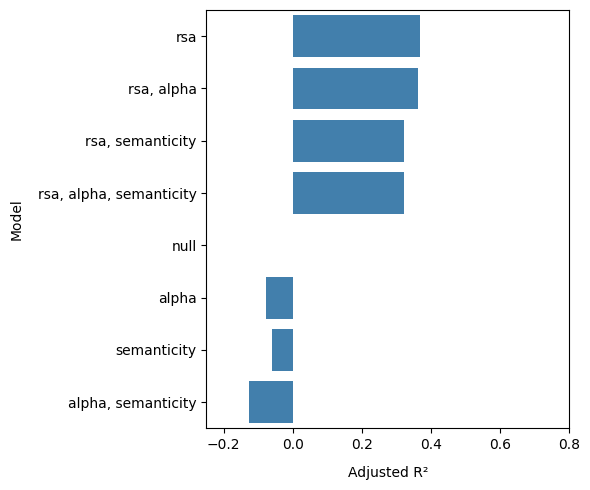

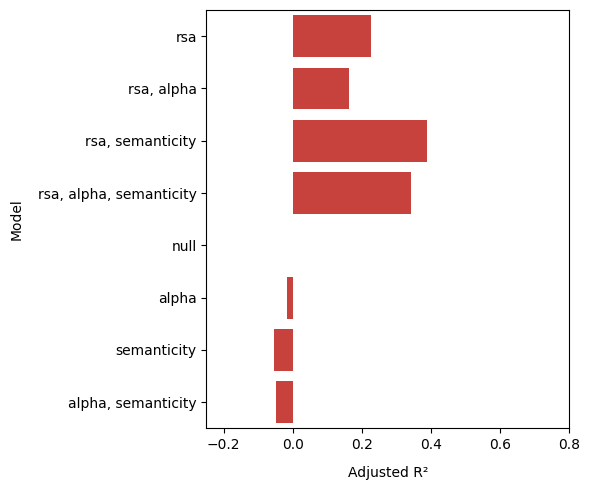

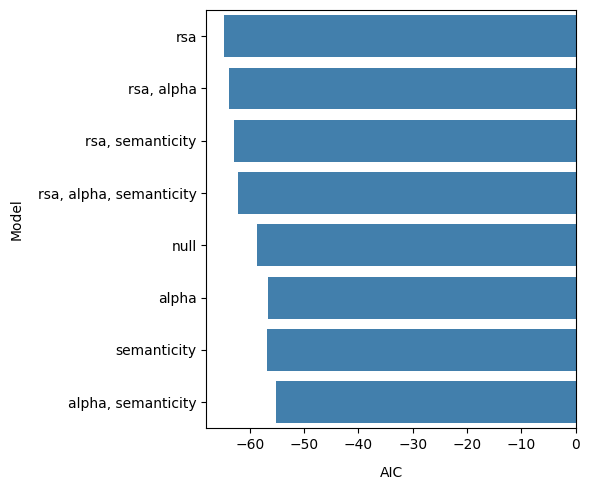

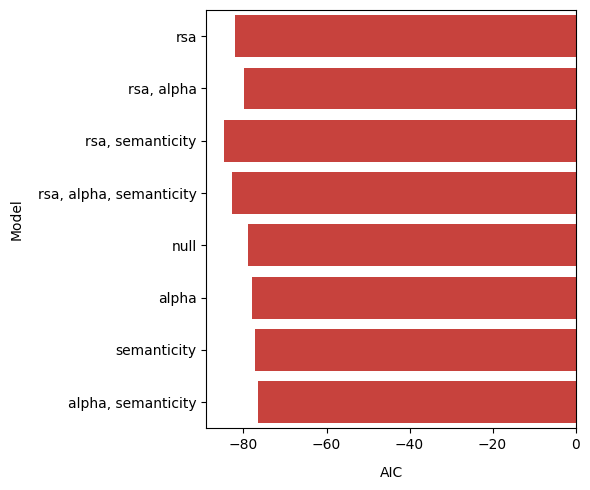

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from cortexlib.utils.plotting import simclr_colours, vgg19_colours

y_order =  [
    "rsa",
    "rsa, alpha",
    "rsa, semanticity",
    "rsa, alpha, semanticity",
    "null",
    "alpha",
    "semanticity",
    "alpha, semanticity"
]

model_colors = {
    'simclr_neural': simclr_colours['layer4'],
    'vgg19_neural': vgg19_colours['conv5_4'],
}

# Unique model types
model_types = summary_df['model_type'].unique()

for model in model_types:
    df_subset = summary_df[summary_df['model_type'] == model]

    plt.figure(figsize=(6, 5))
    sns.barplot(
        data=df_subset,
        x='adj_r2',
        y='model_formula',
        color=model_colors[model],
        order=y_order,
    )

    plt.xlabel("Adjusted R²", labelpad=10)
    plt.ylabel("Model", labelpad=10)
    plt.xlim(-0.25, 0.8)
    plt.tight_layout()
    plt.savefig(f"./bar/figures/multivariate_{model}.svg", format='svg')
    plt.show()

for model in model_types:
    df_subset = summary_df[summary_df['model_type'] == model]

    plt.figure(figsize=(6, 5))
    sns.barplot(
        data=df_subset,
        x='AIC',
        y='model_formula',
        color=model_colors[model],
        order=y_order,
    )

    plt.xlabel("AIC", labelpad=10)
    plt.ylabel("Model", labelpad=10)
    # plt.xlim(-0.25, 0.8)
    plt.tight_layout()
    plt.show()